# EDA-Project 3

Это ваш третий проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"netflix_titles.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
titles = data.copy()

In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Первым делом хотел бы выяснить, какого рода информация содержится в столбцах. Для этого использую value_counts()

In [5]:
titles["type"].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [6]:
titles["title"].value_counts()

Oh My Ghost                      3
Tunnel                           3
Limitless                        3
The Silence                      3
Love                             3
                                ..
Tremors 6: A Cold Day in Hell    1
Penelope                         1
DEATH NOTE                       1
Khoobsurat                       1
Bride For Rent                   1
Name: title, Length: 6172, dtype: int64

In [7]:
titles[titles["title"] == "The Silence"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2387,80244078,Movie,The Silence,Gajendra Ahire,"Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...",India,"March 1, 2018",2017,TV-MA,90 min,"Dramas, International Movies","On a train in Mumbai, 20-something Chini witne..."
2388,80238292,Movie,The Silence,Gajendra Ahire,"Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...",India,"March 1, 2018",2015,TV-MA,91 min,"Dramas, International Movies","After encountering a scene of sexual violence,..."
5464,81021447,Movie,The Silence,John R. Leonetti,"Stanley Tucci, Kiernan Shipka, Miranda Otto, K...",Germany,"April 10, 2019",2019,TV-14,91 min,"Horror Movies, Thrillers",With the world under attack by deadly creature...


In [8]:
titles.duplicated().sum()

0

Просмотрев некоторые тайтлы с одинаковым названием, выяснил, что это не повторяющиеся строки, а просто строки с одинаковым тайтлом.

In [9]:
titles["director"].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
                          ..
Mike Gunther               1
Dave Green                 1
David Koepp                1
Shrihari Sathe             1
Zach Clark                 1
Name: director, Length: 3301, dtype: int64

In [10]:
titles["country"].value_counts()

United States                              2032
India                                       777
United Kingdom                              348
Japan                                       176
Canada                                      141
                                           ... 
Argentina, Uruguay, Serbia                    1
Argentina, United States, Mexico              1
Portugal, France, Poland, United States       1
United States, Taiwan                         1
Turkey, Azerbaijan                            1
Name: country, Length: 554, dtype: int64

In [11]:
titles["rating"].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [12]:
titles["duration"].value_counts()

1 Season     1321
2 Seasons     304
3 Seasons     158
90 min        111
91 min        104
             ... 
37 min          1
33 min          1
36 min          1
209 min         1
34 min          1
Name: duration, Length: 201, dtype: int64

In [13]:
titles["listed_in"].value_counts()

Documentaries                                                299
Stand-Up Comedy                                              273
Dramas, International Movies                                 248
Dramas, Independent Movies, International Movies             186
Comedies, Dramas, International Movies                       174
                                                            ... 
Kids' TV, Spanish-Language TV Shows, Teen TV Shows             1
Classic Movies, Independent Movies, Thrillers                  1
Romantic TV Shows, Spanish-Language TV Shows, TV Comedies      1
British TV Shows, TV Horror, TV Thrillers                      1
Cult Movies, Horror Movies, Thrillers                          1
Name: listed_in, Length: 461, dtype: int64

Выводы из дэйтасета могу сделать следующие:
1. В некоторых столбцах отсутствуют данные. Это касается director, cast, country, date_added. Для обработки данных, придется прибегать к функции dropna.
2. Во многих столбцах данные перечислены через запятую.
3. В этом дэйтасете нет колонки с оценкой зрителя, а потому мы не можем сделать выводы по предпочтениям зрителей.
Все, что мы можем, это найти закономерности в кинематографе той или иной страны или того или иного жанра.
4. Дата добавления может нам подсказать принцип работы самого нетфликса: в каком случае и как долго они добавляют то или иное шоу.
5. Столбец description сложен для анализа. Возможен анализ по ключевым словам, как, например, месть, любовь, дружба, убийство, семья и т.д. Но это все имеет мало смысла, пока у нас нет данных с оценками зрителей.

In [14]:
titles=titles.drop('show_id',axis=1)

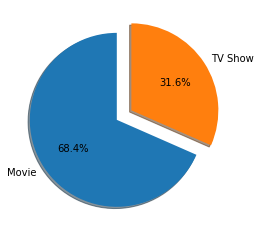

In [15]:
sizes = [len(titles[titles["type"] == "Movie"]),len(titles[titles["type"] == "TV Show"])]

plt.pie(sizes, explode = [0.1]*2, labels = ["Movie", "TV Show"], autopct='%1.1f%%',
        shadow=True, startangle=90);

Большую часть дэйтасета представляют фильмы.

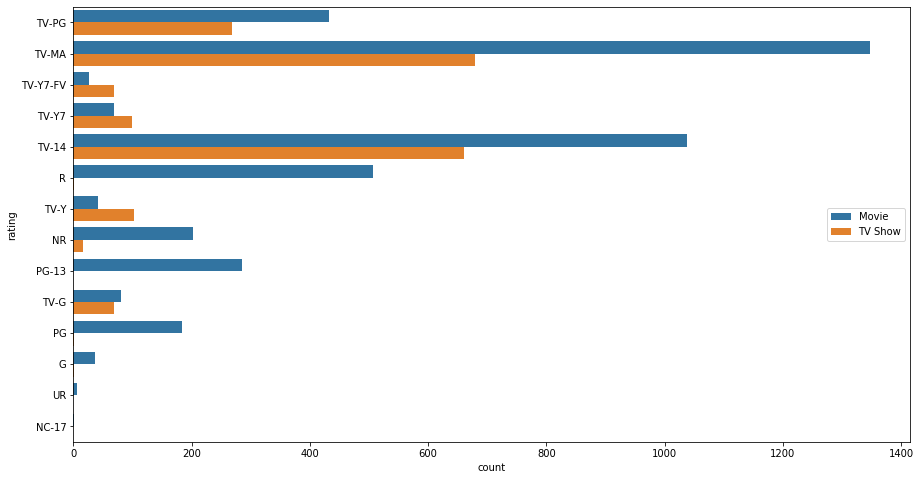

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(y='rating',hue='type',data=titles)
plt.legend(loc = "best");

Как можно заметить на гистограмме сверху, в большинстве возрастных рейтингов преобладают фильмы, за исключением более детских групп: TV-Y7-FV (дети старше 7 с небольшим элементов жестокости), TV-Y7 (дети 7 лет и старше), TV-Y (детей всех возрастов).

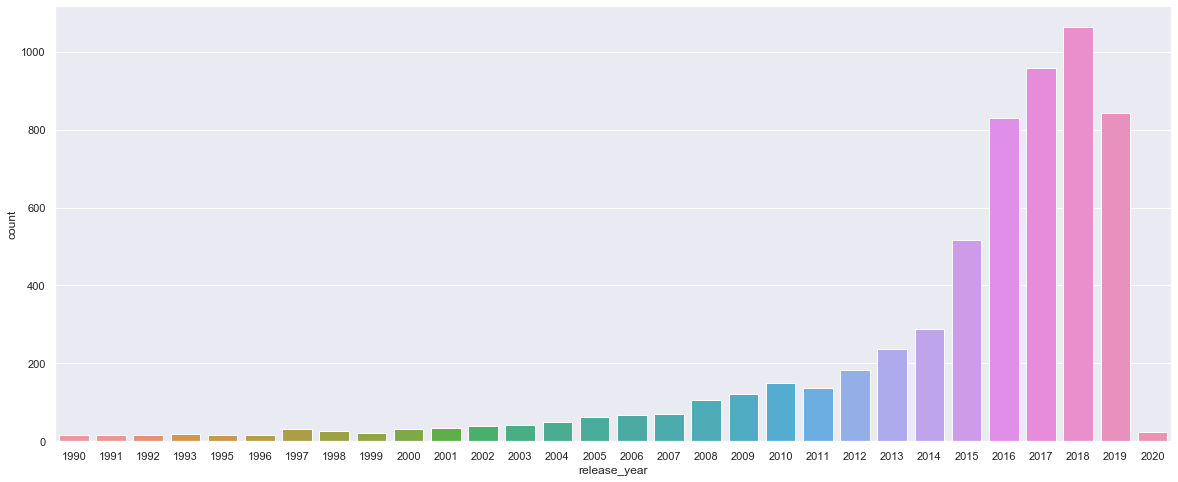

In [17]:
plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
sns.countplot(x='release_year',data=titles,order=sorted(titles['release_year'].value_counts().index[0:30]));

Нетфликс отдает предпочтение новым шоу и фильмам. Хотя, это скорее связано с объемами выпуска шоу/фильмов в мировом кинематографе нежели с предпочтениями нетфликса. Интересно, что количество добавленных шоу/фильмов 2019 года меньше предыдущего года. Возможно, 2019 год был менее урожайным на продукты. 2020 имеет малое значение, так как год еще не закончился, а на момент создания дэйтасета, вероятно, и вовсе только начался.

Теперь рассмотрим отдельно фильмы и тв-шоу. Начнем с фильмов.

# Фильмы

In [18]:
movie = titles[titles["type"] == "Movie"]
movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


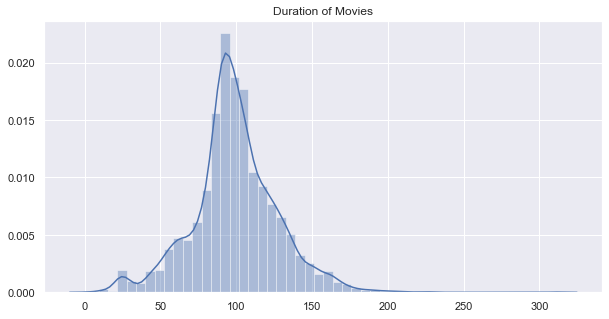

In [19]:
duration = []
movie = movie[movie['duration'].notna()]
for i in movie["duration"]:
    duration.append(int(i.strip(' min')))
plt.figure(figsize=(10,5))
sns.distplot(duration)
plt.title("Duration of Movies");

Средняя продолжительность фильмов - 90 минут.

In [20]:
#from collections import Counter


#directors = set()
#dics_list = []
#for row in movie["director"].dropna():
#    for director in row.split(", "):
#        dics_list.append(director)
#        directors.add(director)
#counter = Counter(dics_list)


#directors = dict([(director, counter[director]) for director in directors])

#Не стал удалять код, чтоб не потерять.

Реализуем функцию для выведения самых востребованных представителей того или иного признака.

In [21]:
def top_representatives_by_feature(data, feature, number):
    fig = plt.figure(figsize = (8,4))
    sns.set(style = "white")
    sns.set_context("talk")
    
    feat_list = []
    for row in data[feature].dropna():
        for representative in row.split(", "):
            feat_list.append(representative)
    feat_list = pd.DataFrame(feat_list, columns = [feature])
    
    sns.countplot(y = feature, data = feat_list, order = feat_list[feature].value_counts().index[0:number]);

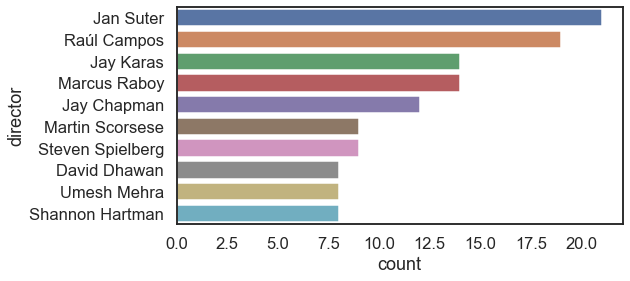

In [22]:
top_representatives_by_feature(data=movie,feature = "director", number = 10)

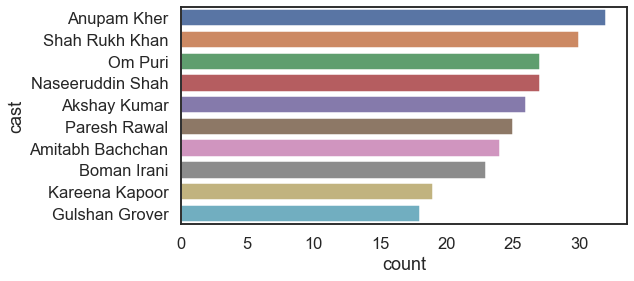

In [23]:
top_representatives_by_feature(data=movie,feature = "cast", number = 10)

Как видно, в числе самых активных актеров в основном индусы, поэтому логичнее выводить список самых популярных актеров по странам.

Так как данная операция объемна с точки зрения кода, а с ней мы еще ни раз встретимся, то реализуем соответствующую функцию.

In [24]:
def top_representatives_by_country_and_feature(data, country_list, feature):
    if feature == "cast":
        feat_in_graph = "actors"
    elif feature == "listed_in":
        feat_in_graph = "genres"
        
    type_of_tv = data["type"].unique()[0].lower()
    
    fig = plt.figure(figsize = (20,5*np.ceil((len(country_list)/2))))
    sns.set(style = "white")
    sns.set_context("poster")
    
    for country in country_list:
        feature_list_country = []
        for row in data[feature][data["country"] == country].dropna():
            for representative in row.split(", "):
                feature_list_country.append(representative)
        feature_list_country = pd.DataFrame(feature_list_country, columns = [feature])
        
        ax = fig.add_subplot(np.ceil((len(country_list)/2)),2,country_list.index(country)+1)
        sns.countplot(y = feature, data =feature_list_country, order = feature_list_country[feature].value_counts().index[0:10])
        plt.title(f"Top {country} {type_of_tv} {feat_in_graph}")
        plt.tight_layout();


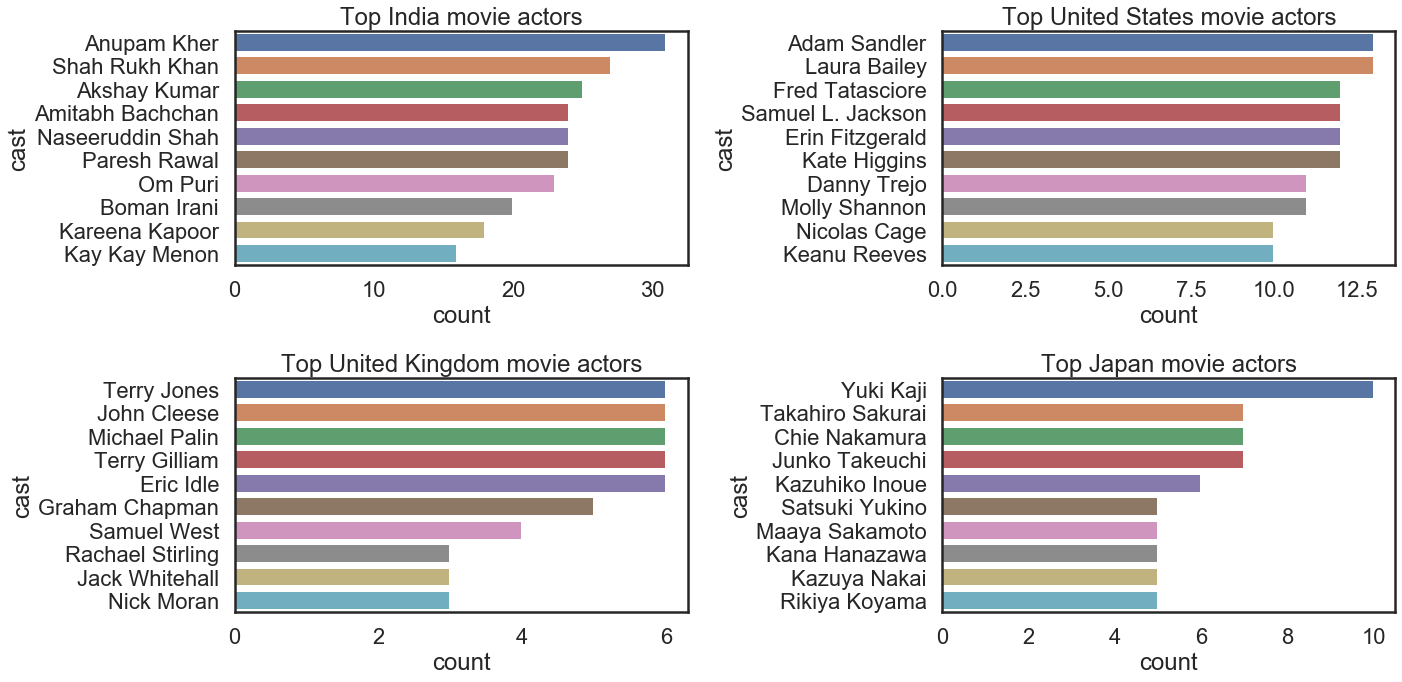

In [25]:
country_list = ["India","United States","United Kingdom","Japan"]

top_representatives_by_country_and_feature(data=movie,country_list=country_list,feature="cast")


Проанализируем, какая страна выпускает больше фильмов.

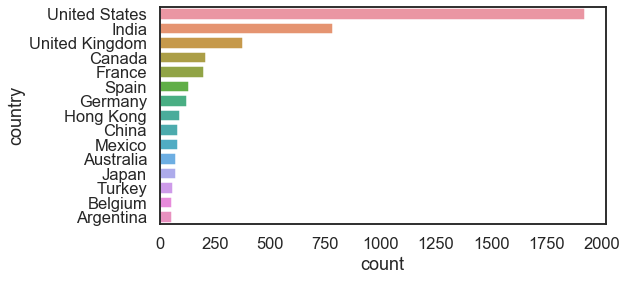

In [26]:
top_representatives_by_feature(data=movie,feature = "country", number = 15)

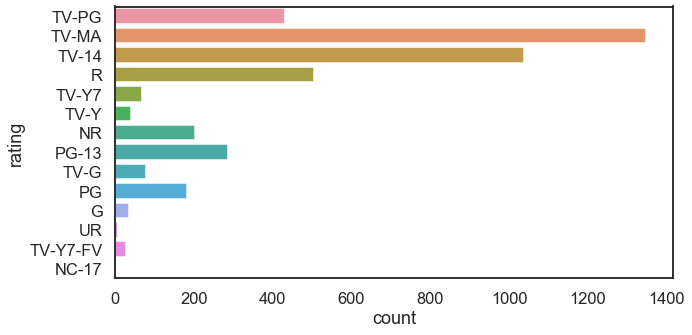

In [27]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(y = "rating", data =movie);

Заметно, что добавляются в основном фильмы для взрослой (самой платежеспособной) аудитории: TV-PG, TV-MA, TV-14 и R.

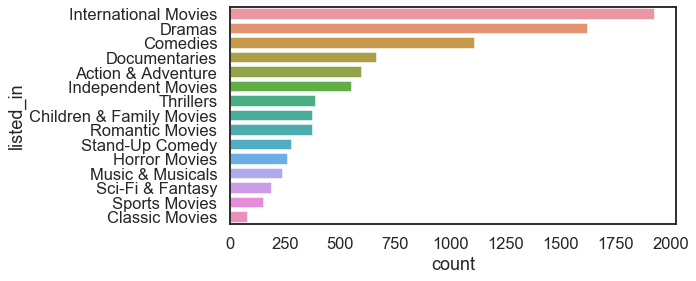

In [28]:
top_representatives_by_feature(data=movie,feature = "listed_in", number = 15)

Наиболее распространенными жанрами являются международные фильмы, драмы и комедии.

Посмотрим на тенденции жанров по странам.

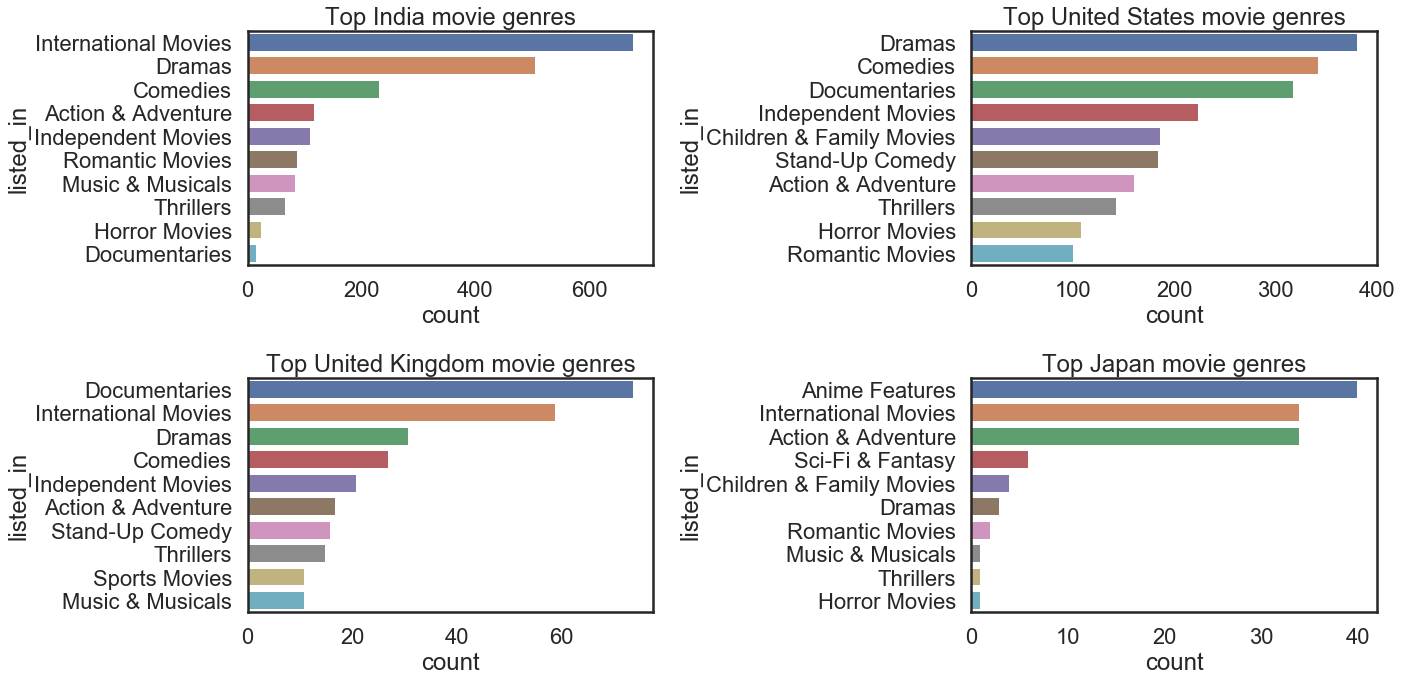

In [29]:
country_list = ["India","United States","United Kingdom","Japan"]

top_representatives_by_country_and_feature(data=movie,country_list=country_list,feature="listed_in")

Очень любопытно, что во всех странах разный акцент на жанры. В Индии: международные фильмы, драмы и комедии; в США: драмы, комедии и документальные фильмы; в Великобритании: документальные фильмы, международные фильмы и драмы; в Японии: аниме, экшн и приключения и международные фильмы. То есть США, имеющий Голивуд не нуждается в сотрудничестве с другими странами при создании фильмов, тогда как другие страны вынуждены искать международные проекты для охвата большей аудитории.

Реализуем функцию, которая выведет самые частоту слов, которые мы предполагаем, в описаниях к фильму/шоу. Тем самым, мы узнаем, какая тема самая популярная в фильмах/шоу нетфликс.

In [30]:
def most_popular_topics(data, topics_list):
    spec_chars = ["!",'"',"'",
              ",","-",".",":",";",
              "?","[","]","(",")",
              "`","{","|","}","~","–"]
        
    for char in spec_chars:
        data["description"] = data["description"].apply(lambda x: x.replace(char, ""))
        data["description"] = data["description"].apply(lambda x: x.lower())
    
    description_list = []
    for row in data["description"].dropna():
        for word in row.split(" "):
            if word in topics_list:
                description_list.append(word)
    description_list = pd.DataFrame(description_list, columns = ["description"])
    
    fig = plt.figure(figsize = (10,5))
    sns.set(style = "white")
    sns.set_context("talk")
    sns.countplot(y = "description", data =description_list, 
                  order = description_list["description"].value_counts().index[0:len(topics_list)]);

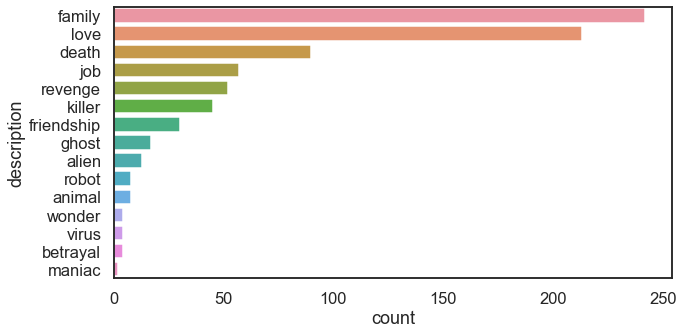

In [31]:
topics_list = ["love","hate","revenge","friendship","family",
                 "job","betrayal","robot","alien","animal","virus",
                 "ghost","killer","maniac","wonder","death"]

most_popular_topics(data=movie, topics_list=topics_list)

Как заметно, самыми распространенными словами в описаниях к фильмам являются "семья", "любовь" и "смерть".

In [32]:
movie = movie.dropna()

movie["date_added"] = pd.to_datetime(movie['date_added'])
movie['day_added'] = movie['date_added'].dt.day
movie['year_added'] = movie['date_added'].dt.year
movie['month_added']=movie['date_added'].dt.month
movie['year_added'].astype(int);
movie['day_added'].astype(int);

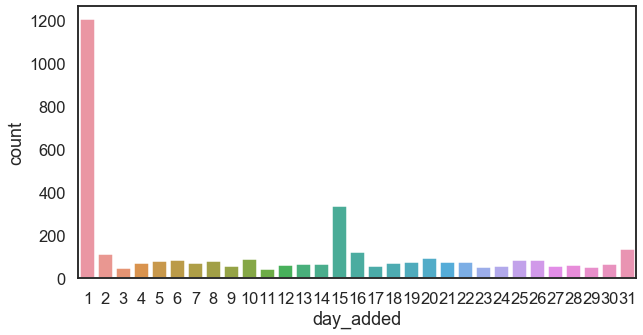

In [33]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "day_added", data =movie, order = sorted(movie["day_added"].value_counts().index[0:32]));

Самый частый день добавления - 1 число, далее  - 15. Это означает, что в системе нетфликс зачастую новые фильмы добавляются в начале месяца или в середине.

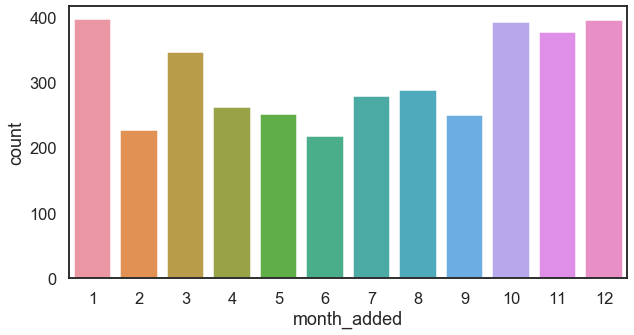

In [34]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "month_added", data =movie, order = sorted(movie["month_added"].value_counts().index[0:32]));

Добавление фильмов по месяцам тоже определяется сезонностью, так большее количество фильмов добавляется в начале года и в конце.

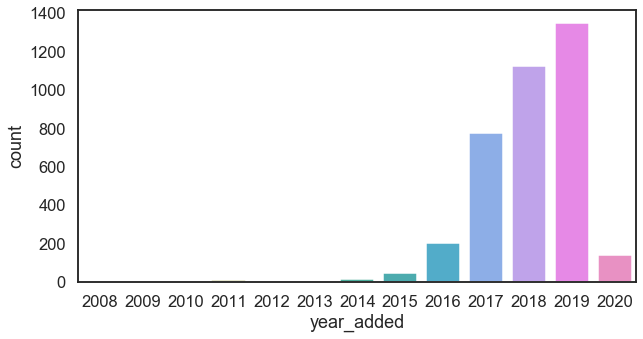

In [35]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "year_added", data =movie, order = sorted(movie["year_added"].value_counts().index[0:32]));

Ежегодно, не считая 2020 года, который только начался, количество добавленных фильмов растет очень стремительно, начиная с 2015 года, когда нетфликс только набирал обороты.

Настала очередь ТВ-шоу.

# ТВ-шоу

In [50]:
tv = titles[titles["type"] == "TV Show"]
tv.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


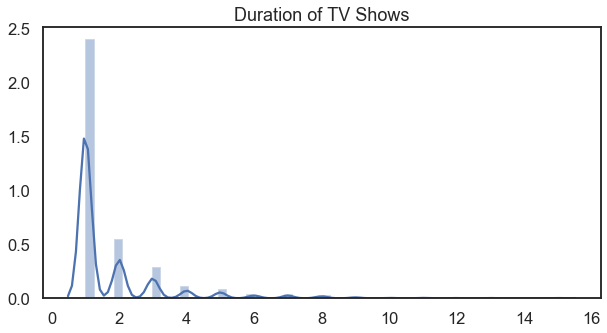

In [37]:
duration = []
tv = tv[tv['duration'].notna()]
for i in tv["duration"]:
    duration.append(int(i.strip(' Season')))
plt.figure(figsize=(10,5))
sns.distplot(duration)
plt.title("Duration of TV Shows");

Подавляющее большинство ТВ-шоу оканчиваются на первом сезоне.

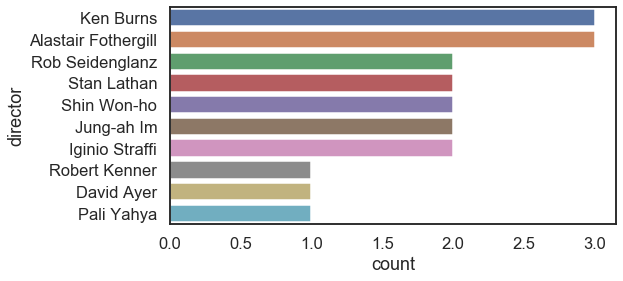

In [38]:
top_representatives_by_feature(data=tv,feature = "director", number = 10)

Самый популярный директор в ТВ-шоу снял всего 3 проекта, что намного меньше, чем снимают директоры в фильмах. Это можно объяснить тем, что в сериалами и шоу зачастую занимаются менее именитые режиссеры.

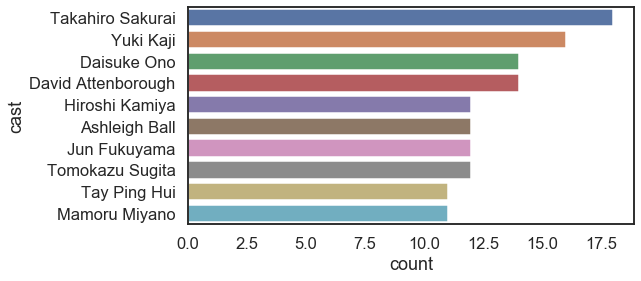

In [39]:
top_representatives_by_feature(data=tv,feature = "cast", number = 10)

То же касается и актеров. Попробуем определить самых популярных актеров по странам, как мы делали в фильмах.

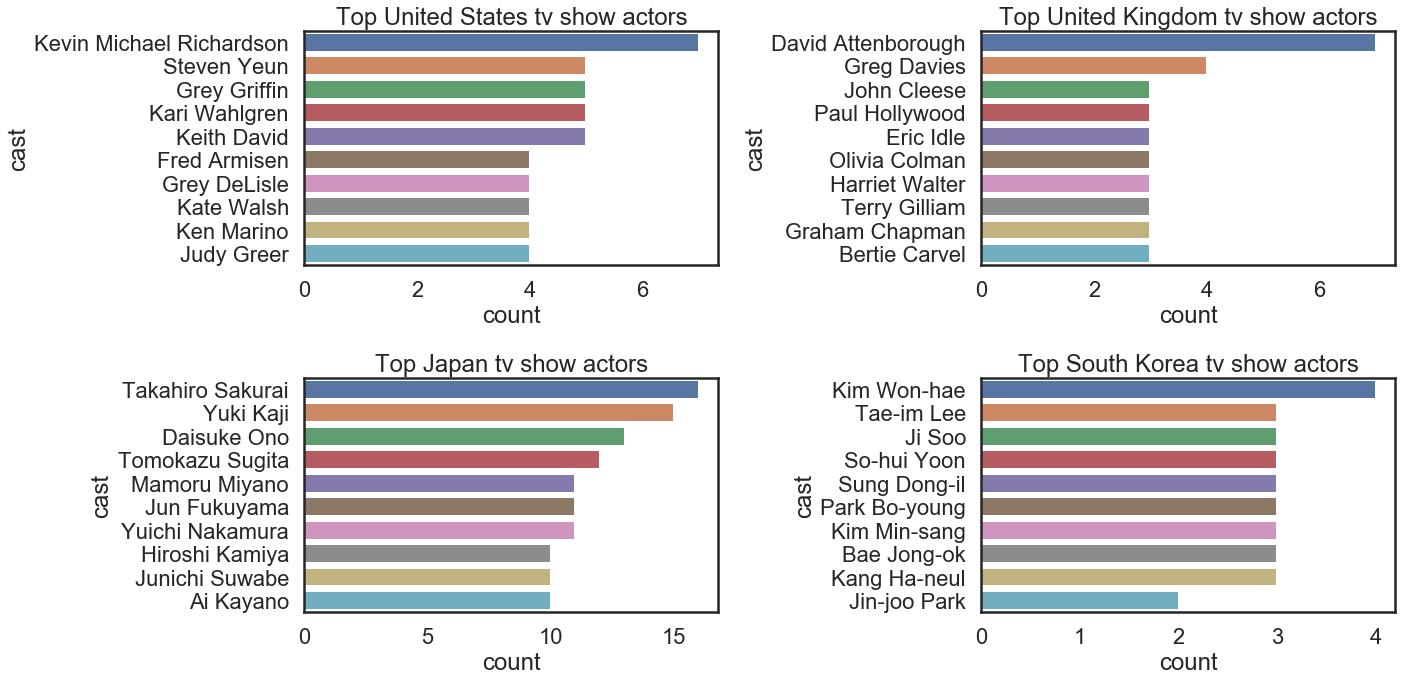

In [51]:
country_list = ["United States","United Kingdom","Japan","South Korea"]

top_representatives_by_country_and_feature(data=tv,country_list=country_list,feature="cast")

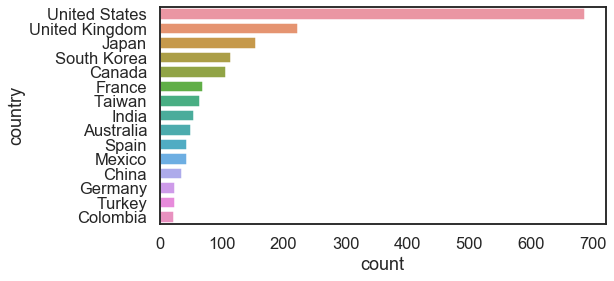

In [41]:
top_representatives_by_feature(data=tv,feature = "country", number = 15)

В ТВ-шоу наиболее активными странами являются США (с большим отрывом), Великобритания, Япония и Южная Корея.

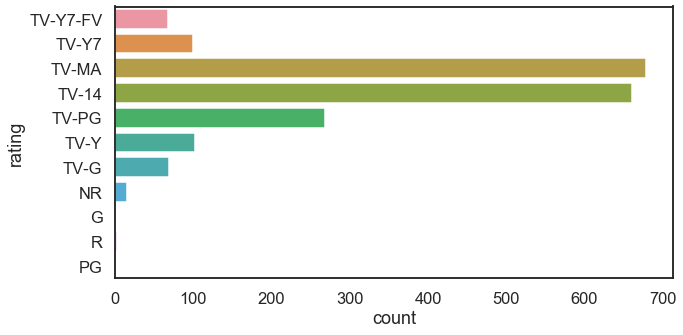

In [42]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(y = "rating", data =tv);

С большим отрывом преобладают ТВ-шоу с рейтингами TV-MA (для взрослых) и TV-14 (для лиц старше 14).

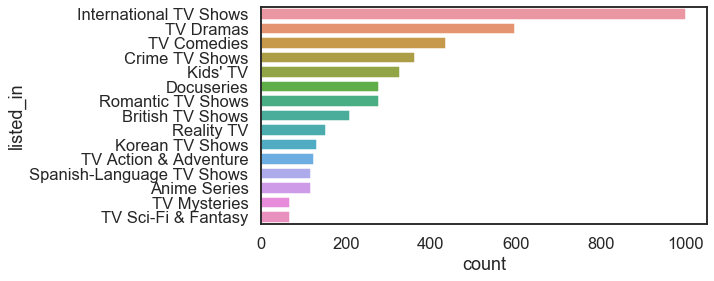

In [43]:
top_representatives_by_feature(data=tv,feature = "listed_in", number = 15)

Как и в фильмах, самыми популярными жанрами являются международные шоу, драмы и комедии.
Рассмотрим тенденцию по странам.

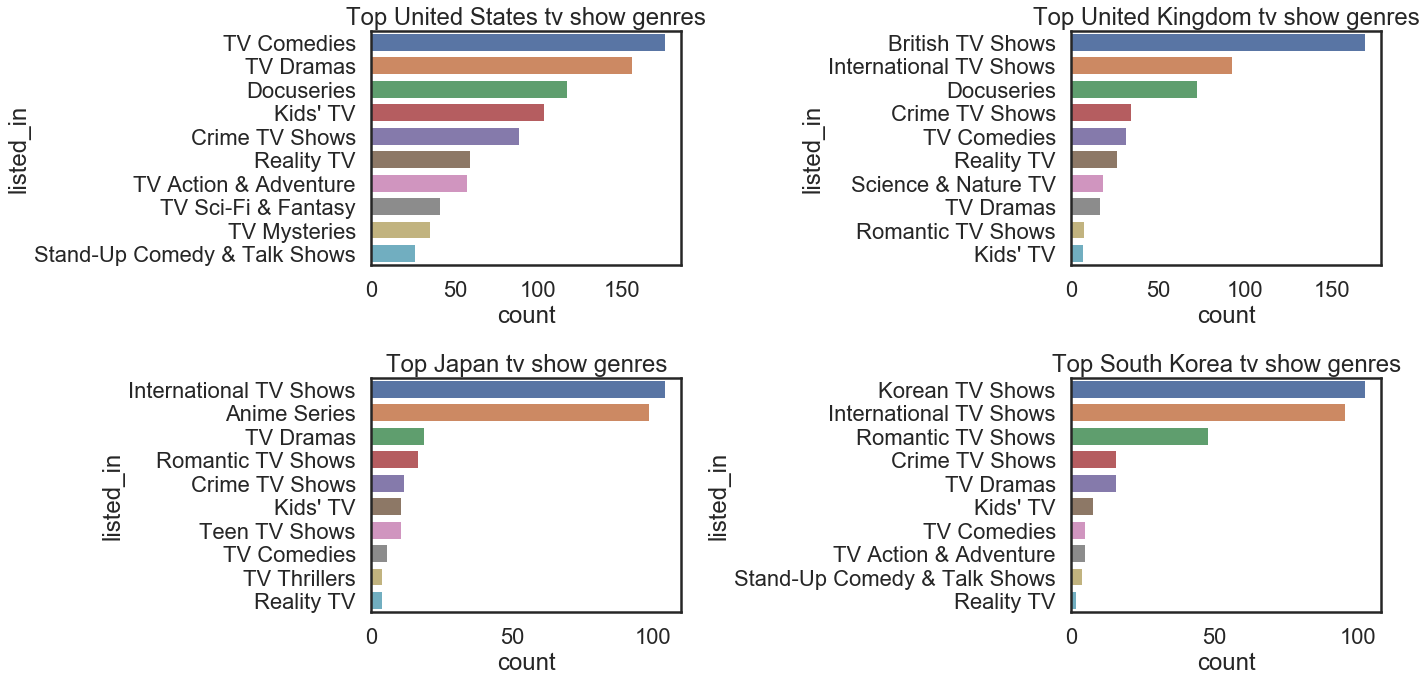

In [52]:
country_list = ["United States","United Kingdom","Japan","South Korea"]

top_representatives_by_country_and_feature(data=tv,country_list=country_list,feature="listed_in")

Помимо международных шоу, интересна популярность документальных шоу, а также заметна популярность жанров, свойственных конкретной стране (британские шоу, аниме или дорамы).

Как и в фильмах, разберем (очень поверхностно), какая тема является самой популярной в тв-шоу.

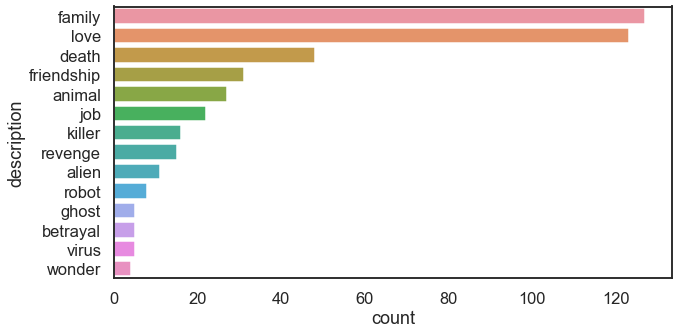

In [45]:
topics_list = ["love","hate","revenge","friendship","family",
                 "job","betrayal","robot","alien","animal","virus",
                 "ghost","killer","maniac","wonder","death"]

most_popular_topics(data=tv, topics_list=topics_list)

Ожидаемо, с большим отрывом так же побеждают темы "семьи", "любви" и "смерти".

In [46]:
tv = tv.dropna()

tv["date_added"] = pd.to_datetime(tv['date_added'])
tv['day_added'] = tv['date_added'].dt.day
tv['year_added'] = tv['date_added'].dt.year
tv['month_added']=tv['date_added'].dt.month
tv['year_added'].astype(int);
tv['day_added'].astype(int);

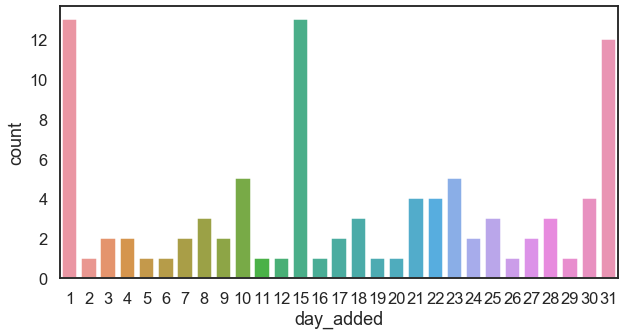

In [47]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "day_added", data =tv, order = sorted(tv["day_added"].value_counts().index[0:32]));

Ярко выражена тенденция добавлять шоу в начале, середине и конце месяца.

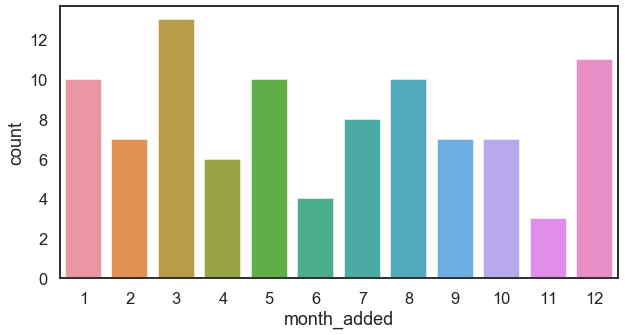

In [48]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "month_added", data =tv, order = sorted(tv["month_added"].value_counts().index[0:32]));

Очень любопытно, что самым частым месяцем добавления шоу является март, далее в одинаковой степени январь, май, август и декабрь (последние месяцы времен года или сезонов).

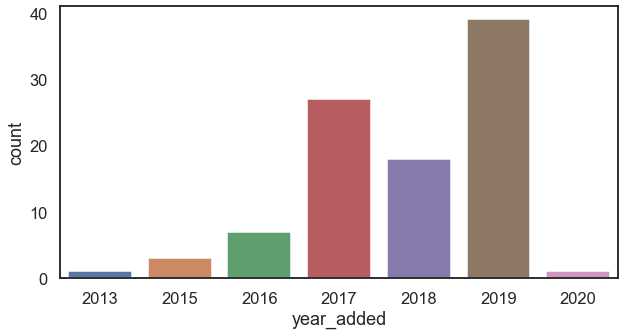

In [49]:
fig = plt.figure(figsize = (10,5))
sns.set(style = "white")
sns.set_context("talk")
sns.countplot(x = "year_added", data =tv, order = sorted(tv["year_added"].value_counts().index[0:32]));

Судя по всему, нетфликс первые годы (с 2008 до 2012) не был заинтересован в ТВ-шоу, однако с 2013 занялся этой сферой, постепенно увеличивая их количество. Странно, что в 2018 году объем добавленных ТВ-шоу сократился почти в 1,5 раза, а в 2019 увеличился в два.